# Разведочный анализ данных IMDb

## Предполагается исследовать рейтинги, бюджет и доходы в эквиваленте usd

## План выполнения EDA:

### Датасет содержит следующие поля:

1. title - Наименование фильма (категориальный, номинальный);
2. average_rating - Усредненный рейтинг IMDb (числовой, непрерывный);
3. director - Режиссер (категориальный, номинальный);
4. writer - Сценарист (категориальный, номинальный);
5. metascore - Оценки из <a href="https://www.metacritic.com/">Metacritic</a> (числовой, непрерывный);
6. cast - Ключевые актеры (категориальный, номинальный);
7. country_of_origin - Страна происхождения (категориальный, номинальный);
8. languages - Языки (категориальный, номинальный);
9. runtime - Длительность (числовой, дискретный);
10. genre - Жанр (категориальный, номинальный);
11. budget - Бюджет (числовой, дискретный);
12. worldwide_gross - Кассовые сборы (числовой, дискретный);
13. release_year - Дата выхода (числовой, дискретный);
14. profit_or_loss - Прибыль/убыток (числовой, дискретный);
15. p&l_rate - Отношение прибыли/убытка к бюджету фильма (числовой, непрерывный).

### Необходимо расширить датасет:

1. Отобрать топ-5 сценаристов из поля writer                       (если есть) и сохранить в новые колонки по шаблону writer_*,   где звездочка номер сценариста;
2. Отобрать топ-5 ключевых актеров из поля cast                    (если есть) и сохранить в новые колонки по шаблону cast_*,     где звездочка номер ключевого актера;
3. Отобрать топ-5 языков из поля languages                         (если есть) и сохранить в новые колонки по шаблону language_*, где звездочка номер языка;
4. Отобрать топ-5 жанров из поля genre                             (если есть) и сохранить в новые колонки по шаблону genre_*,    где звездочка номер жанра;
5. Отобрать топ-5 стран происхождения из поля country_of_origin    (если есть) и сохранить в новые колонки по шаблону
   country_of_origin_*, где звездочка номер жанра;

### В рамках разведочного анализа данных сделать выявить зависимости между:

1. Режиссером и рейтингом;
2. Режиссером и бюджетом;
3. Режиссером и жанром;
4. Режиссером и кассовыми сборами;
5. Сценаристом и рейтингом;
6. Сценаристом и бюджетом;
7. Сценаристом и жанром;
8. Сценаристом и кассовыми сборами;
10. Ключевым актером и рейтингом;
11. Ключевым актером и бюджетом;
12. Ключевым актером и жанром;
13. Ключевым актером и кассовыми сборами;
14. Языком и рейтингом;
15. Языком и бюджетом;
16. Языком и жанром;
17. Языком и кассовыми сборами;
18. Жанром и рейтингом;
19. Жанром и бюджетом;
20. Жанром и кассовыми сборами;
21. Страной происхождения и рейтингом;
22. Страной происхождения и бюджетом;
23. Страной происхождения и жанром;
24. Страной происхождения и кассовыми сборами;
25. Годом выхода и рейтингом;
26. Годом выхода и бюджетом;
27. Годом выхода и жанром;
28. Годом выхода и кассовыми сборами;

### Сделать выводы и предложения по дальнейшему анализу.

### Импорт библиотек, загрузка данных

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Базовый анализ на данных "as is"

## Пункт 1: Загрузка данных

In [2]:
path = os.getcwd()
os.chdir("../part_1_data_collect/vlad")
df = pd.read_csv(f'{os.getcwd()}/eda_df.csv')

# Просмотр первых 5 строк
print(df.head())

   Unnamed: 0                     title  average_rating              director  \
0           0  The Shawshank Redemption             9.3        Frank Darabont   
1           1             The Godfather             9.2  Francis Ford Coppola   
2           4           The Dark Knight             9.0     Christopher Nolan   
3           5          Schindler's List             9.0      Steven Spielberg   
4           6              12 Angry Men             9.0          Sidney Lumet   

                                              writer  metascore  \
0                       Stephen King, Frank Darabont         82   
1                   Mario Puzo, Francis Ford Coppola        100   
2  Jonathan Nolan, Christopher Nolan, David S. Goyer         84   
3                   Thomas Keneally, Steven Zaillian         95   
4                                      Reginald Rose         97   

                                                cast  \
0  Tim Robbins, Morgan Freeman, Bob Gunton, Willi...  

## Пункт 2: Проверка структуры данных

In [3]:
print(f"Размер данных:\n{df.shape}")

Размер данных:
(1455, 16)


In [4]:
df = df.drop(columns='Unnamed: 0')

In [5]:
print(f"Типы данных:\n{df.dtypes}")

Типы данных:
title                 object
average_rating       float64
director              object
writer                object
metascore              int64
cast                  object
country_of_origin     object
languages             object
runtime                int64
genre                 object
budget                 int64
worldwide_gross        int64
release_year           int64
profit_or_loss         int64
p&l_rate             float64
dtype: object


In [6]:
print(f"Пропущенные значения:\n{df.isnull().sum()}")

Пропущенные значения:
title                0
average_rating       0
director             0
writer               0
metascore            0
cast                 0
country_of_origin    0
languages            0
runtime              0
genre                0
budget               0
worldwide_gross      0
release_year         0
profit_or_loss       0
p&l_rate             0
dtype: int64


## Пункт 3: Описательная статистика

In [7]:
# Основная статистика для числовых переменных
print(f"Описательная статистика:\n{df.describe()}")

Описательная статистика:
       average_rating    metascore      runtime        budget  \
count     1455.000000  1455.000000  1455.000000  1.455000e+03   
mean         7.609759    73.377320   121.134021  3.078353e+07   
std          0.357549    12.526666    24.259159  4.636157e+07   
min          7.200000    25.000000     2.000000  2.500000e+03   
25%          7.300000    66.000000   105.000000  3.600000e+06   
50%          7.500000    73.000000   119.000000  1.400000e+07   
75%          7.800000    82.000000   134.000000  3.500000e+07   
max          9.300000   100.000000   271.000000  3.551000e+08   

       worldwide_gross  release_year  profit_or_loss      p&l_rate  
count     1.455000e+03   1455.000000    1.455000e+03   1455.000000  
mean      1.275457e+08   1997.533333    9.676220e+07    474.996893  
std       2.474767e+08     21.534434    2.125636e+08   1606.678629  
min       1.900000e+01   1920.000000   -1.580311e+08   -100.000000  
25%       5.651243e+06   1986.500000   -5.18

In [8]:
# Уникальные значения для категориальных переменных
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nУникальные значения в столбце '{col}':")
    print(df[col].unique())


Уникальные значения в столбце 'title':
['The Shawshank Redemption' 'The Godfather' 'The Dark Knight' ... 'Savior'
 'Powaqqatsi' 'Irina Palm']

Уникальные значения в столбце 'director':
['Frank Darabont' 'Francis Ford Coppola' 'Christopher Nolan'
 'Steven Spielberg' 'Sidney Lumet' 'Peter Jackson' 'Quentin Tarantino'
 'David Fincher' 'Robert Zemeckis' 'Martin Scorsese' 'Milos Forman'
 'Irvin Kershner' 'Jonathan Demme' 'Frank Capra' 'James Cameron'
 'Ridley Scott' 'Denis Villeneuve' 'Damien Chazelle' 'Luc Besson'
 'Alfred Hitchcock' 'Tony Kaye' 'Bryan Singer' 'Roman Polanski'
 'Michael Curtiz' 'Charles Chaplin' 'Todd Phillips' 'Stanley Kubrick'
 'Andrew Stanton' 'Billy Wilder' 'Nadine Labaki' 'Nag Ashwin'
 'Gus Van Sant' 'Michel Gondry' 'Darren Aronofsky' 'Sam Mendes'
 'Michael Mann' 'Park Chan-wook' 'Mel Gibson' 'Brian De Palma'
 'Sergio Leone' 'John Lasseter' 'Jean-Pierre Jeunet' 'David Lean'
 'Richard Marquand' 'Lee Unkrich' 'Orson Welles' 'Robert Mulligan'
 'George Roy Hill' 'Stanley

## Пункт 4: Визуализация данных

### Гистограммы для числовых переменных

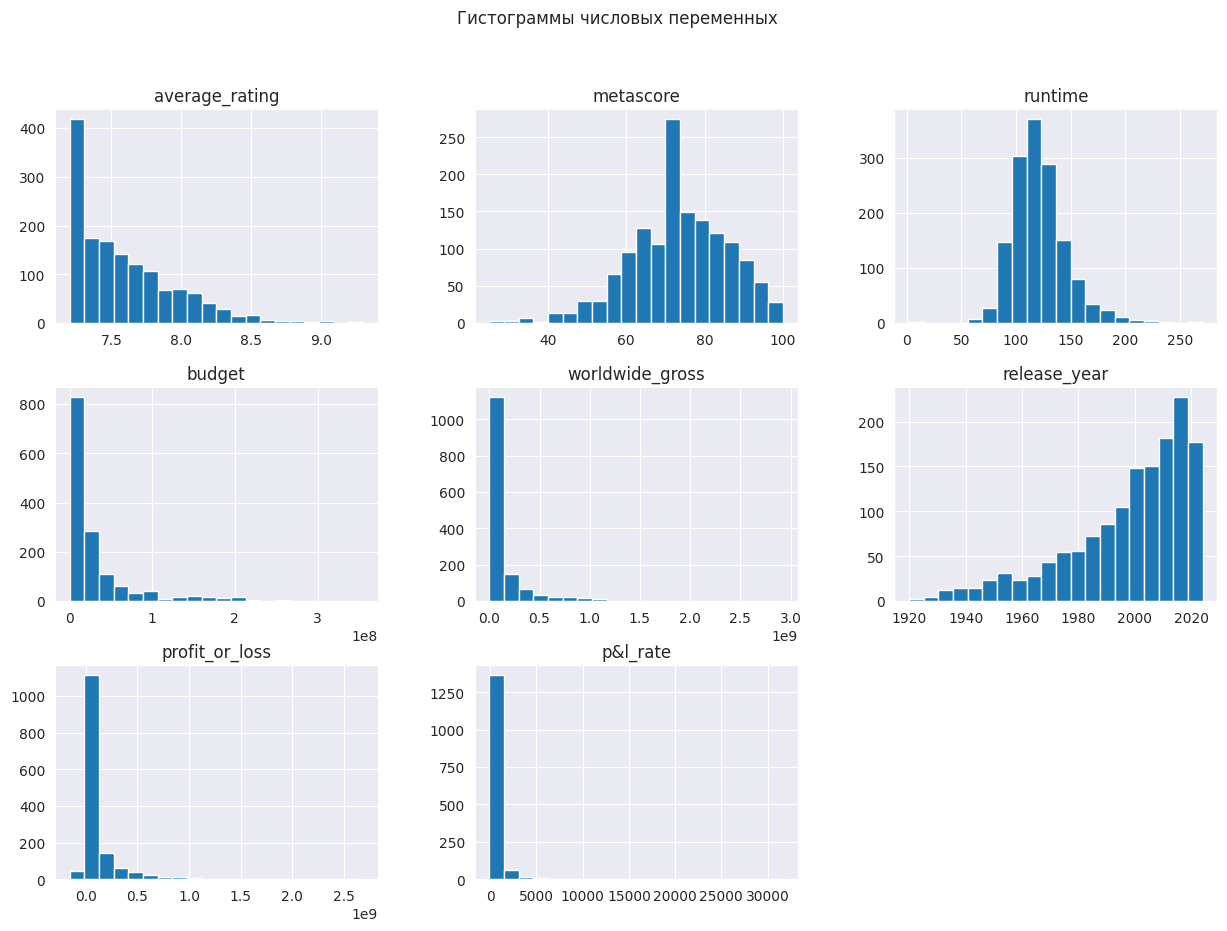

In [9]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle("Гистограммы числовых переменных")
plt.show()

### Выводы.
Большое количество картин с невысоким рейтингом.
Metascore пока не оценивается в качестве критерия для фильмов ввиду субъективности оценки.
Продолжительность фильмов в среднем 120 минут.
У небольшого количества картин очень большой бюджет, как и кассовые сборы в мире.
По году выпуска виден рост числа снимаемых картин ща после 2000 года, а увеличение наблюдается после 80-х годов.
Показатели profit_or_loss/p&l_rate ввиду расчетного характера остаются без анализа.


### Корреляционная матрица

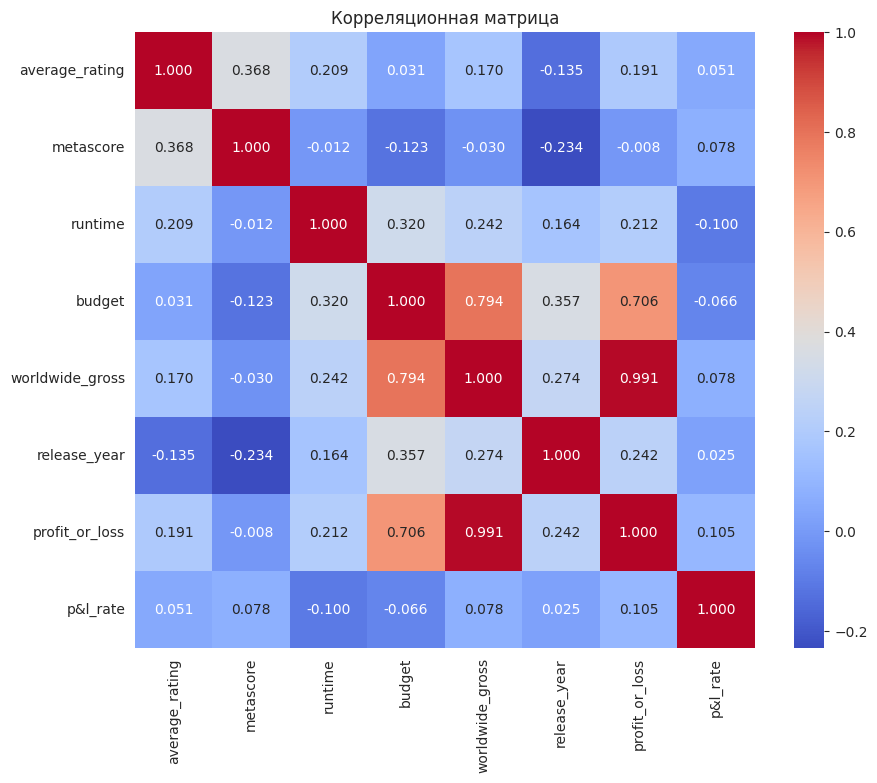

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, fmt=".3f", cmap='coolwarm')
plt.title("Корреляционная матрица")
plt.show()

### Выводы.
Явно видна связь между бюджетом, кассовыми сборами и косвенно с годом выпуска. Весьма вероятно это обусловлено либо технологическим (спецэффекты), либо режиссерским , либо актерским, либо сценаристским, либо жанровым факторами. Или их совокупностью.

### Boxplot для выявления выбросов

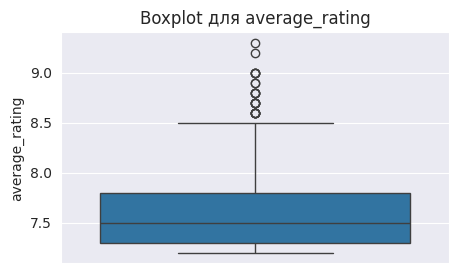

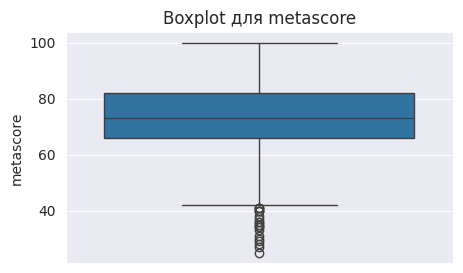

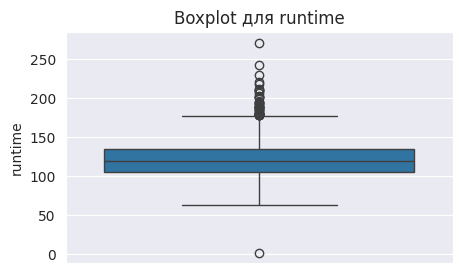

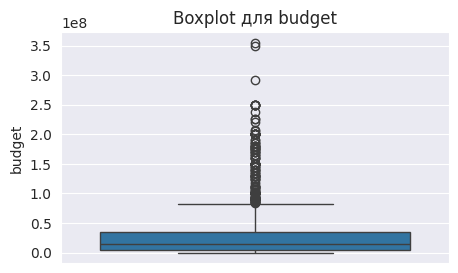

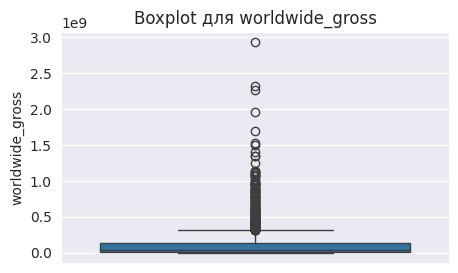

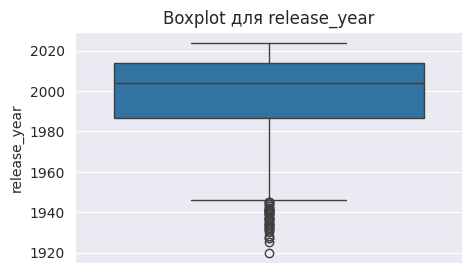

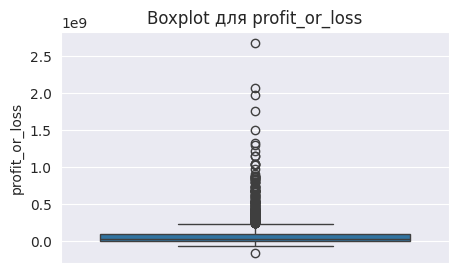

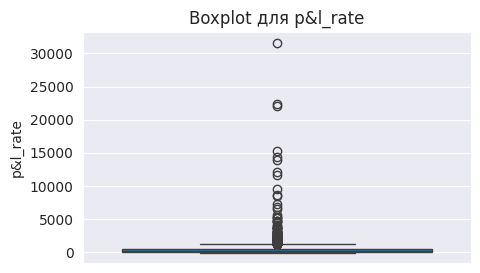

In [11]:
for col in numeric_columns:
    plt.figure(figsize=(5, 3))
    sns.boxplot(data=df[col])
    plt.title(f"Boxplot для {col}")
    plt.show()

### Гистограммы для категориальных переменных

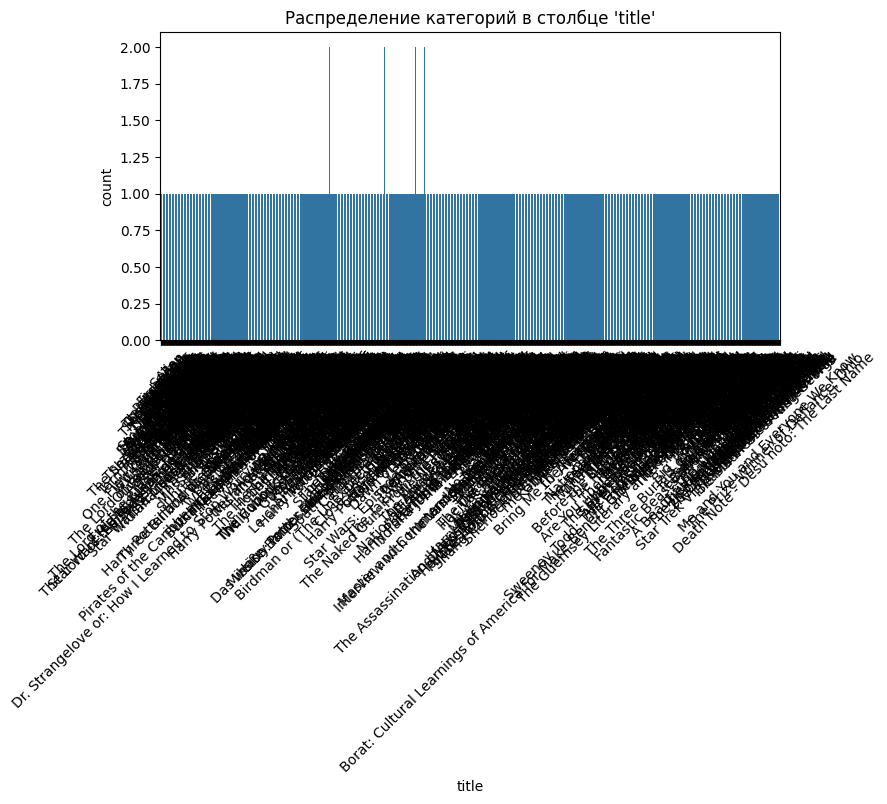

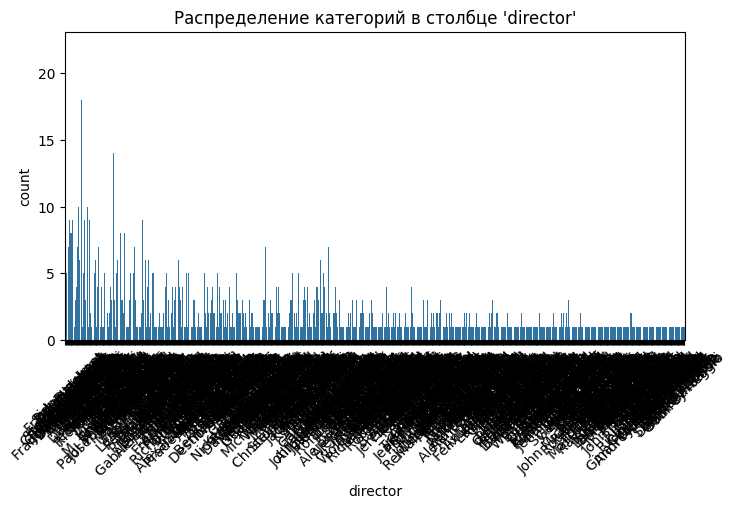

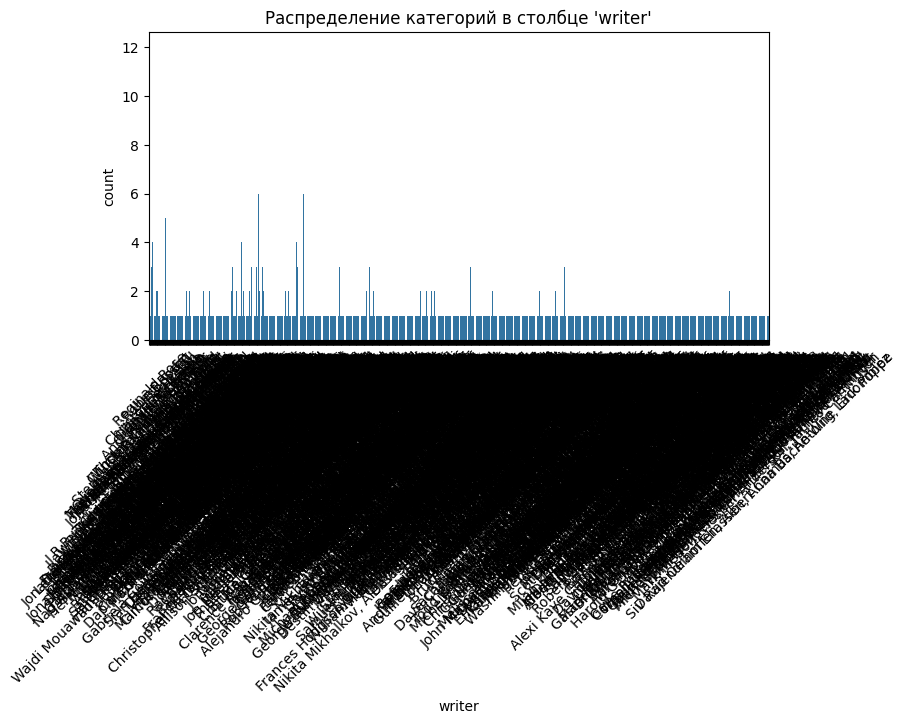

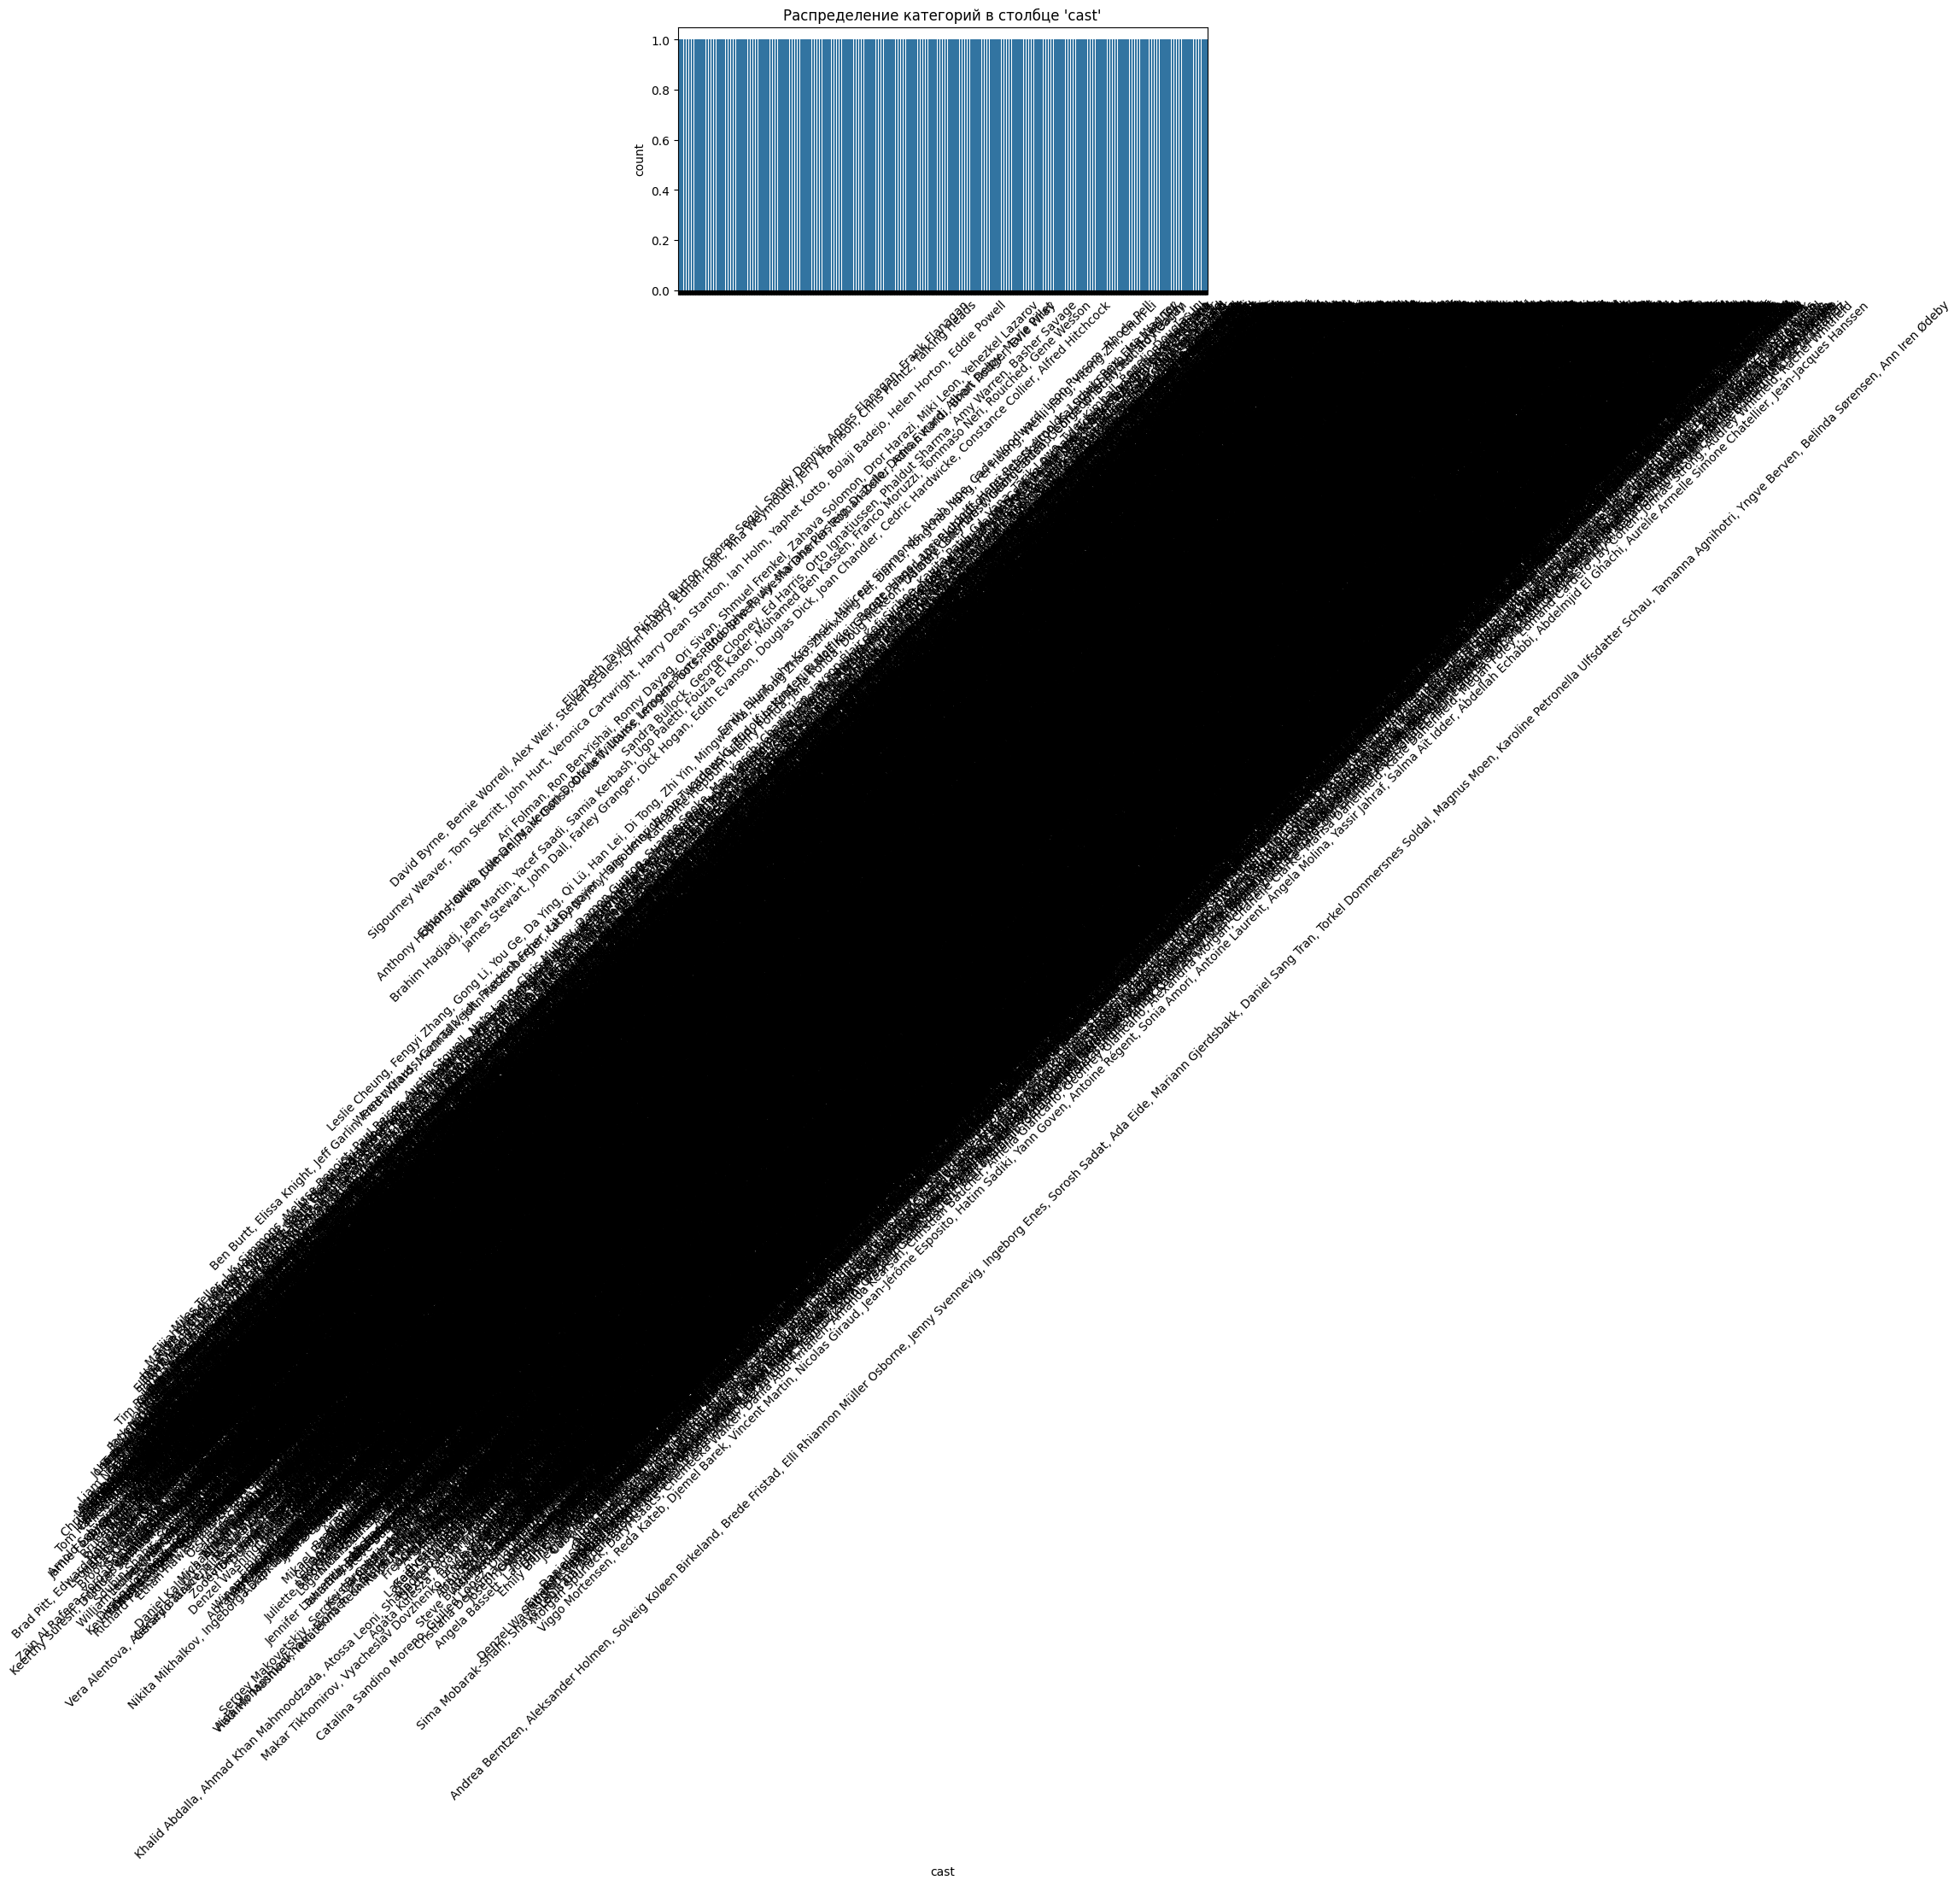

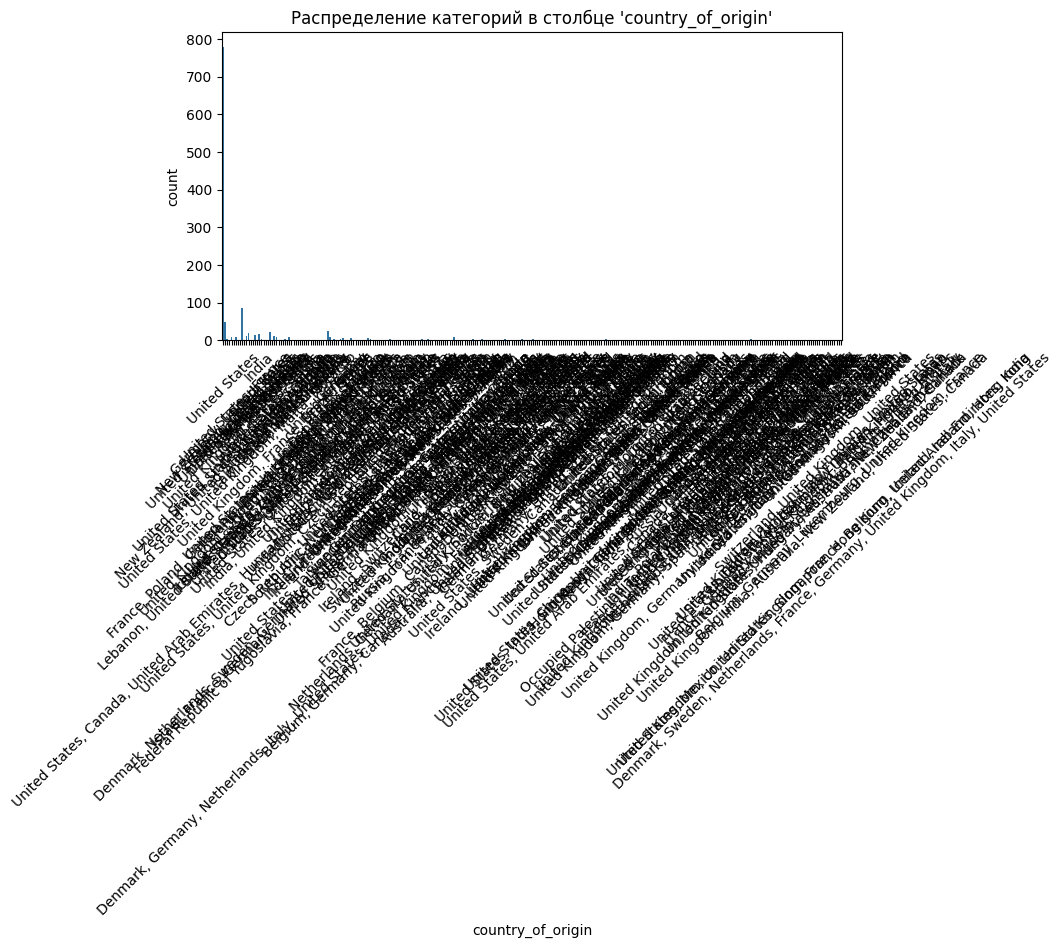

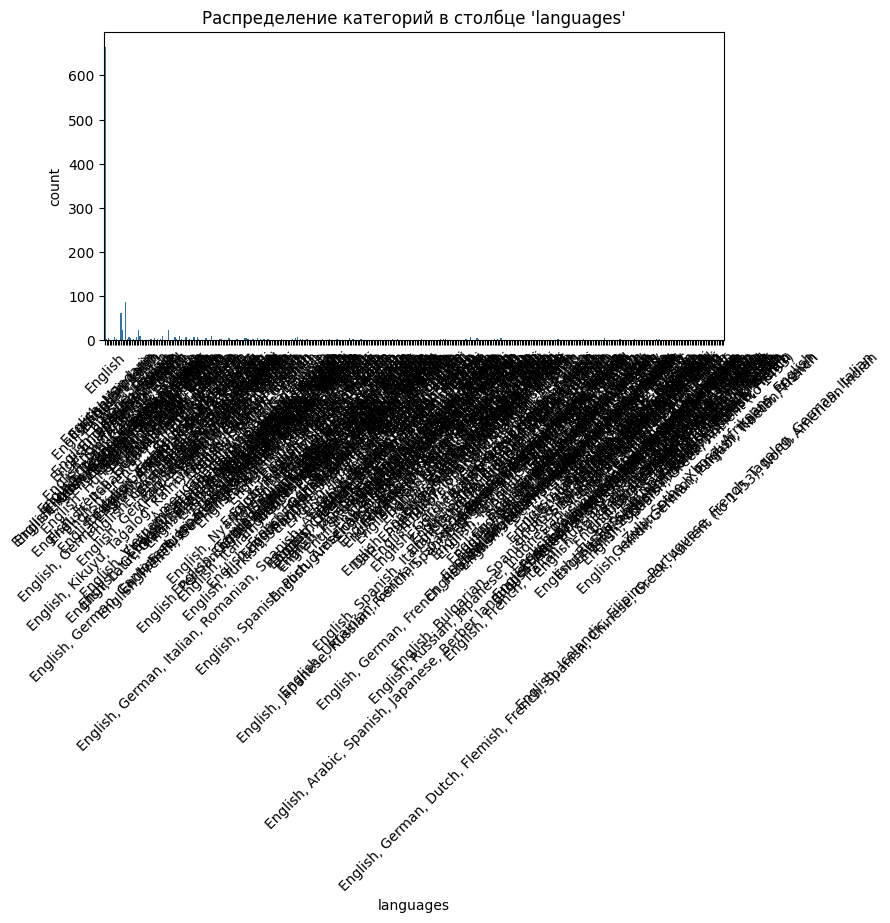

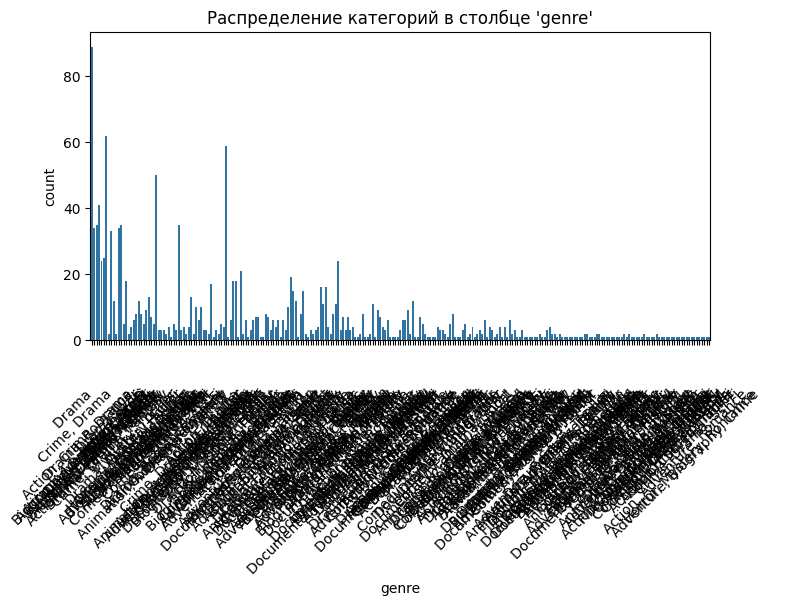

In [23]:
# Забегая вперед, данные, мягко говоря, грязноваты и в нынешнем виде малоинформативны.
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.title(f"Распределение категорий в столбце '{col}'")
    plt.xticks(rotation=45)
    plt.show()

# 2. Расширенный анализ

## Пункт 1. Обработка полей, расширение датасета и сохранение датасета

In [24]:
# Функция для разделения строки и выбора топ-5 элементов
def extract_top_n_items(row, n=5):
    """
    Разделение строки на элементы, удаление лишних
    пробелов и выбор топ-n элементов.
    Если элементов меньше n, список дополняется пустыми значениями.
    """
    if isinstance(row, str):  # Проверка, что значение не NaN
        items = [item.strip() for item in row.split(',') if item.strip()]
        return items[:n] + [''] * (n - len(items))  # Дополнение до n элементов
    return [''] * n  # Если значение NaN, возвращается пустой список

In [25]:
# 1. Обработка сценаристов (writer)

# Создание новых колонок writer_1, writer_2, ..., writer_5
writer_columns = [f'writer_{i+1}' for i in range(5)]

# Заполнение колонок сценаристов топ-5 значениями (если есть)
df[writer_columns] = df['writer'].apply(lambda x: pd.Series(extract_top_n_items(x, 5)))

In [26]:
# 2. Обработка ключевых актеров (cast)

# Создание новых колонок cast_1, cast_2, ..., cast_5
cast_columns = [f'cast_{i+1}' for i in range(5)]

# Заполнение колонок актеров топ-5 значениями (если есть)
df[cast_columns] = df['cast'].apply(lambda x: pd.Series(extract_top_n_items(x, 5)))

In [27]:
# 3. Обработка языков (languages)

# Создание новых колонок language_1, language_2, ..., language_5
language_columns = [f'language_{i+1}' for i in range(5)]

# Заполнение колонок актеров топ-5 значениями (если есть)
df[language_columns] = df['languages'].apply(lambda x: pd.Series(extract_top_n_items(x, 5)))

In [28]:
# 4. Обработка жанров (genre)

# Создание новых колонок genre_1, genre_2, ..., genre_5
genre_columns = [f'genre_{i+1}' for i in range(5)]

# Заполнение колонок жанров топ-5 значениями (если есть)
df[genre_columns] = df['genre'].apply(lambda x: pd.Series(extract_top_n_items(x, 5)))

In [29]:
# 5. Обработка стран происхождения (country_of_origin)

# Создание новых колонок country_of_origin_1, country_of_origin_2, ..., country_of_origin_5
country_of_origin_columns = [f'country_of_origin_{i+1}' for i in range(5)]

# Заполнение колонок актеров топ-5 значениями (если есть)
df[country_of_origin_columns] = df['country_of_origin'].apply(lambda x: pd.Series(extract_top_n_items(x, 5)))

In [30]:
# Что в итоге получилось
print(df.head())

   Unnamed: 0                     title  average_rating              director  \
0           0  The Shawshank Redemption             9.3        Frank Darabont   
1           1             The Godfather             9.2  Francis Ford Coppola   
2           4           The Dark Knight             9.0     Christopher Nolan   
3           5          Schindler's List             9.0      Steven Spielberg   
4           6              12 Angry Men             9.0          Sidney Lumet   

                                              writer  metascore  \
0                       Stephen King, Frank Darabont         82   
1                   Mario Puzo, Francis Ford Coppola        100   
2  Jonathan Nolan, Christopher Nolan, David S. Goyer         84   
3                   Thomas Keneally, Steven Zaillian         95   
4                                      Reginald Rose         97   

                                                cast  \
0  Tim Robbins, Morgan Freeman, Bob Gunton, Willi...  

## Пункт 2. Анализ зависимостей на основе расширенных данных

Топ режиссеров по среднему рейтингу:
director
Frank Darabont        8.950000
Irvin Kershner        8.700000
Luc Besson            8.500000
Tony Kaye             8.500000
Andrew Stanton        8.400000
Nag Ashwin            8.400000
Jonathan Demme        8.333333
Park Chan-wook        8.300000
Robert Mulligan       8.300000
Swaroop Rsj           8.300000
Jean-Pierre Jeunet    8.300000
John Lasseter         8.300000
Lee Unkrich           8.300000
Michel Gondry         8.300000
Richard Marquand      8.300000
Name: average_rating, dtype: float64


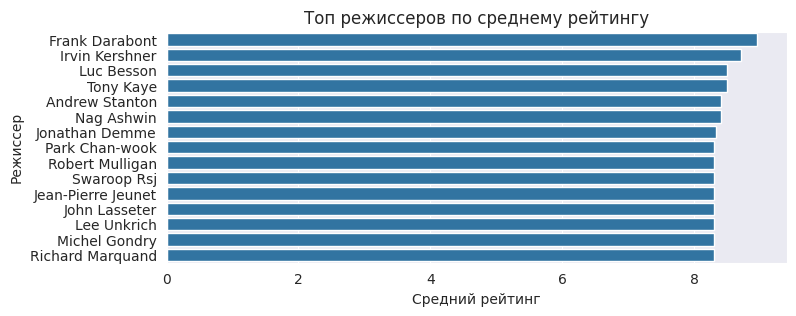

In [31]:
# 1. Режиссер и рейтинг
director_rating = df.groupby('director')['average_rating'].mean().sort_values(ascending=False)
print("Топ режиссеров по среднему рейтингу:")
print(director_rating.head(15))

# Визуализация
plt.figure(figsize=(8, 3))
sns.barplot(x=director_rating.head(15).values, y=director_rating.head(15).index)
plt.title("Топ режиссеров по среднему рейтингу")
plt.xlabel("Средний рейтинг")
plt.ylabel("Режиссер")
plt.show()


Топ режиссеров по среднему бюджету:
director
Christopher McQuarrie    2.063333e+08
James Gunn               2.012500e+08
Kelsey Mann              2.000000e+08
Gareth Edwards           2.000000e+08
Lee Unkrich              2.000000e+08
Dan Scanlon              1.875000e+08
Andrew Stanton           1.800000e+08
Jon Watts                1.783333e+08
J.J. Abrams              1.700000e+08
Joss Whedon              1.696667e+08
Matt Reeves              1.683333e+08
Gore Verbinski           1.666667e+08
David Yates              1.660000e+08
Rich Moore               1.650000e+08
Scott Derrickson         1.650000e+08
Name: budget, dtype: float64


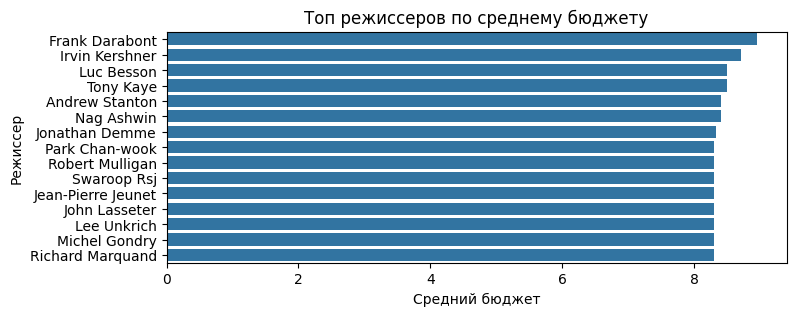

In [69]:
# 2. Режиссер и бюджет
director_budget = df.groupby('director')['budget'].mean().sort_values(ascending=False)
print("\nТоп режиссеров по среднему бюджету:")
print(director_budget.head(15))

# Визуализация
plt.figure(figsize=(8, 3))
sns.barplot(x=director_rating.head(15).values, y=director_rating.head(15).index)
plt.title("Топ режиссеров по среднему бюджету")
plt.xlabel("Средний бюджет")
plt.ylabel("Режиссер")
plt.show()


Жанры режиссеров:
0             Drama
1             Crime
2            Action
3         Biography
4             Crime
           ...     
1450      Biography
1451      Biography
1452          Drama
1453    Documentary
1454         Comedy
Name: genre_1, Length: 1439, dtype: object


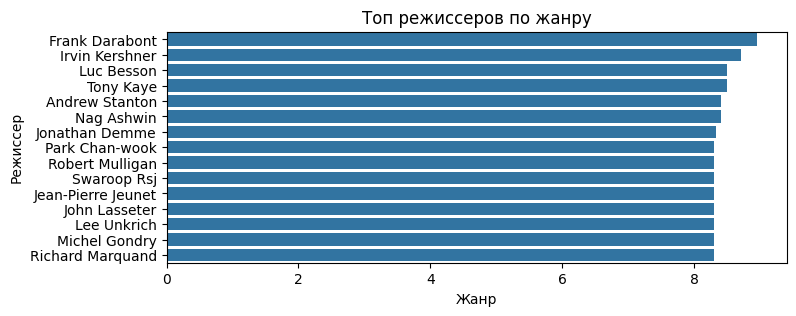

In [78]:
# 3. Режиссер и жанр
director_genre = df.groupby('director')['genre_1']#.mean().sort_values(ascending=False)
print("\nЖанры режиссеров:")
print(director_genre.head(15))

# Визуализация
plt.figure(figsize=(8, 3))
sns.barplot(x=director_rating.head(15).values, y=director_rating.head(15).index)
plt.title("Топ режиссеров по жанру")
plt.xlabel("Жанр")
plt.ylabel("Режиссер")
plt.show()


Топ режиссеров по кассовым сборам:
director
James Cameron        8574259387
Steven Spielberg     6955324256
Peter Jackson        6463305143
Christopher Nolan    6205459936
David Yates          5003353447
Jon Watts            3966372984
Joss Whedon          2966001713
Robert Zemeckis      2793892268
James Gunn           2651380481
Brad Bird            2592965176
Bryan Singer         2384251866
Martin Scorsese      2240693157
Sam Mendes           2167937748
Clint Eastwood       2151780381
Ridley Scott         2049078964
Name: worldwide_gross, dtype: int64


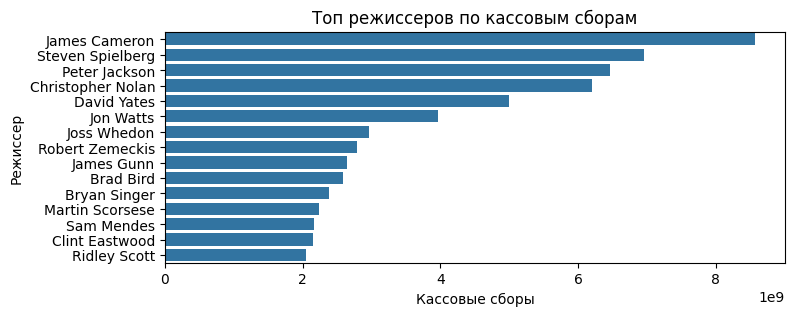

In [80]:
# 4. Режиссер и кассовые сборы
director_revenue = df.groupby('director')['worldwide_gross'].sum().sort_values(ascending=False)
print("\nТоп режиссеров по кассовым сборам:")
print(director_revenue.head(15))

# Визуализация
plt.figure(figsize=(8, 3))
sns.barplot(x=director_revenue.head(15).values, y=director_revenue.head(15).index)
plt.title("Топ режиссеров по кассовым сборам")
plt.xlabel("Кассовые сборы")
plt.ylabel("Режиссер")
plt.show()

### Вывод.
Однозначно видна зависимость между режиссером и кассовыми сборами.
С усредненным рейтингом прослеживается косвенная зависимость.

Топ сценаристов по среднему рейтингу:
writer_1
Reginald Rose          9.00
Thomas Keneally        9.00
J.R.R. Tolkien         8.90
Winston Groom          8.80
Chuck Palahniuk        8.80
Jonathan Demme         8.70
Lawrence Hauben        8.70
Jonathan Nolan         8.65
Frances Goodrich       8.60
Andrew Kevin Walker    8.60
Joseph Stefano         8.50
Ronald Harwood         8.50
Denis Villeneuve       8.50
David McKenna          8.50
Nicholas Pileggi       8.45
Name: average_rating, dtype: float64


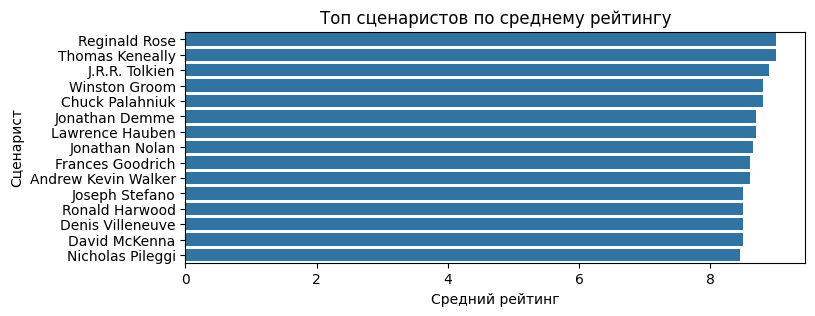

In [82]:
# 5. Сценарист и рейтинг (writer_1 vs average_rating).
writer_rating = df.groupby('writer_1')['average_rating'].mean().sort_values(ascending=False)
print("Топ сценаристов по среднему рейтингу:")
print(writer_rating.head(15))

# Визуализация
plt.figure(figsize=(8, 3))
sns.barplot(x=writer_rating.head(15).values, y=writer_rating.head(15).index)
plt.title("Топ сценаристов по среднему рейтингу")
plt.xlabel("Средний рейтинг")
plt.ylabel("Сценарист")
plt.show()


Топ сценаристов по среднему бюджету:
writer_1
David Magee           355100000.0
James Gunn            201250000.0
Neal Purvis           200000000.0
Meg LeFauve           200000000.0
Simon Kinberg         200000000.0
Dave Callaham         200000000.0
Chris Weitz           200000000.0
Denis Villeneuve      190000000.0
Dan Scanlon           187500000.0
Matt Reeves           185000000.0
Ted Elliott           182500000.0
Chris McKenna         180000000.0
Andrew Stanton        180000000.0
Jonathan Goldstein    175000000.0
Justin Marks          175000000.0
Name: budget, dtype: float64


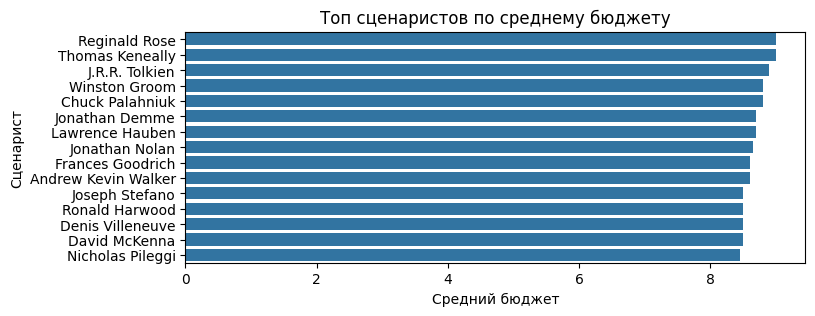

In [83]:
# 6. Сценарист и бюджет (writer_1 vs budget).
writer_budget = df.groupby('writer_1')['budget'].mean().sort_values(ascending=False)
print("\nТоп сценаристов по среднему бюджету:")
print(writer_budget.head(15))

# Визуализация
plt.figure(figsize=(8, 3))
sns.barplot(x=writer_rating.head(15).values, y=writer_rating.head(15).index)
plt.title("Топ сценаристов по среднему бюджету")
plt.xlabel("Средний бюджет")
plt.ylabel("Сценарист")
plt.show()


Жанры режиссеров:
0             Drama
1             Crime
2            Action
3         Biography
4             Crime
           ...     
1450      Biography
1451      Biography
1452          Drama
1453    Documentary
1454         Comedy
Name: genre_1, Length: 1454, dtype: object


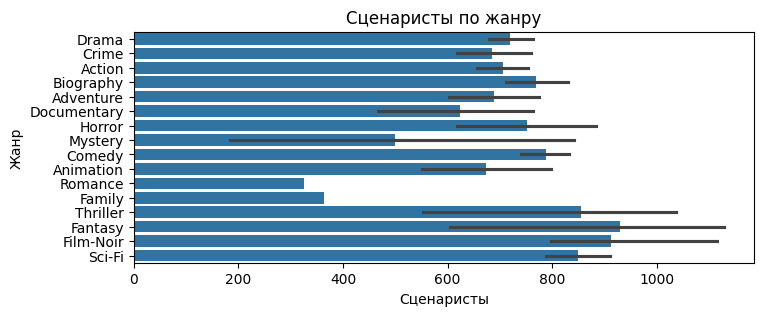

In [86]:
# 7. Сценарист и жанр (writer_1 vs genre)
writer_genre = df.groupby('writer_1')['genre_1']#.mean().sort_values(ascending=False)
print("\nЖанры и сценаристы:")
print(writer_genre.head(15))

# Визуализация
plt.figure(figsize=(8, 3))
sns.barplot(x=writer_genre.head(15).index, y=writer_genre.head(15).values)
plt.title("Сценаристы по жанру")
plt.xlabel("Сценаристы")
plt.ylabel("Жанр")
plt.show()


Топ сценаристов по кассовым сборам:
writer_1
James Cameron        8987199221
Steve Kloves         4141922243
Fran Walsh           3498396519
Bruce Geller         3197404450
Chris McKenna        3085428774
Joss Whedon          2966001713
Jonathan Nolan       2965760800
J.R.R. Tolkien       2964666001
Christopher Nolan    2750535123
James Gunn           2651380481
John Lasseter        2535594081
J.K. Rowling         2507069011
Neal Purvis          2499324696
Brad Bird            1874914165
Ted Elliott          1720444293
Name: worldwide_gross, dtype: int64


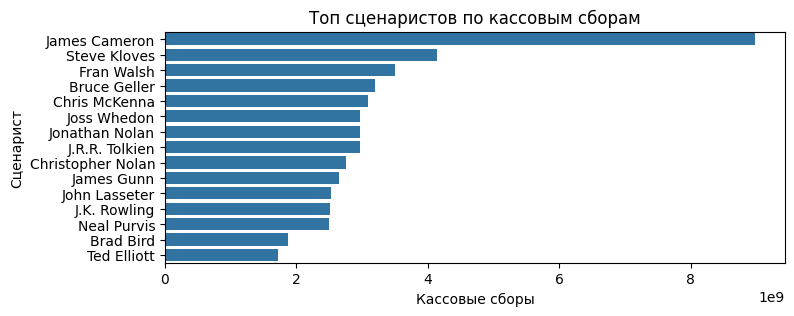

In [87]:
# 8. Сценарист и кассовые сборы (writer_1 vs worldwide_gross)
writer_worldwide_gross = df.groupby('writer_1')['worldwide_gross'].sum().sort_values(ascending=False)
print("\nТоп сценаристов по кассовым сборам:")
print(writer_worldwide_gross.head(15))

# Визуализация
plt.figure(figsize=(8, 3))
sns.barplot(x=writer_worldwide_gross.head(15).values, y=writer_worldwide_gross.head(15).index)
plt.title("Топ сценаристов по кассовым сборам")
plt.xlabel("Кассовые сборы")
plt.ylabel("Сценарист")
plt.show()

### Вывод.
Видна не совсем однозначная зависимость между сценаристом и кассовыми сборами.
По другим показателям зависимость неоднонозначная.

Топ ключевых актеров по среднему рейтингу:
cast_1
David Byrne          8.700
Marlon Brando        8.650
Elijah Wood          8.525
Mark Hamill          8.500
Timothée Chalamet    8.500
Adrien Brody         8.500
Miles Teller         8.500
Jean Reno            8.500
Keerthy Suresh       8.400
Ben Burtt            8.400
Guy Pearce           8.400
Zain Al Rafeea       8.400
F. Murray Abraham    8.400
Liam Neeson          8.350
Choi Min-sik         8.300
Name: average_rating, dtype: float64


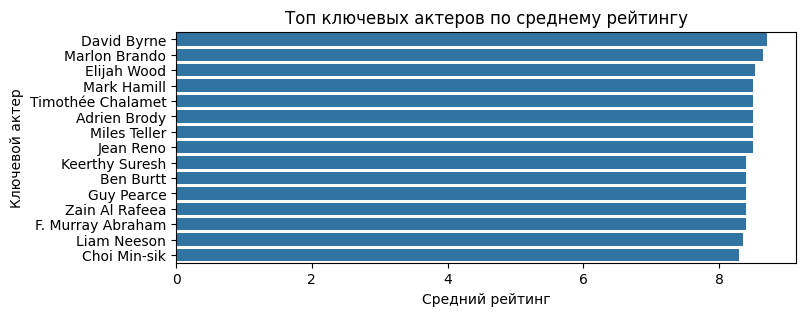

In [88]:
# 9. Ключевой актер и рейтинг (cast_1 vs average_rating).
cast_rating = df.groupby('cast_1')['average_rating'].mean().sort_values(ascending=False)
print("Топ ключевых актеров по среднему рейтингу:")
print(cast_rating.head(15))

# Визуализация
plt.figure(figsize=(8, 3))
sns.barplot(x=cast_rating.head(15).values, y=cast_rating.head(15).index)
plt.title("Топ ключевых актеров по среднему рейтингу")
plt.xlabel("Средний рейтинг")
plt.ylabel("Ключевой актер")
plt.show()

Топ ключевых актеров по среднему бюджету:
cast_1
Halle Bailey         3.551000e+08
Sam Worthington      2.935000e+08
Chris Pratt          2.066667e+08
Simu Liu             2.000000e+08
Felicity Jones       2.000000e+08
Amy Poehler          2.000000e+08
Timothée Chalamet    1.900000e+08
Ben Burtt            1.800000e+08
Martin Freeman       1.800000e+08
Tom Holland          1.775000e+08
Neel Sethi           1.750000e+08
Tye Sheridan         1.750000e+08
Rosa Salazar         1.700000e+08
John C. Reilly       1.650000e+08
Ian McKellen         1.616667e+08
Name: budget, dtype: float64


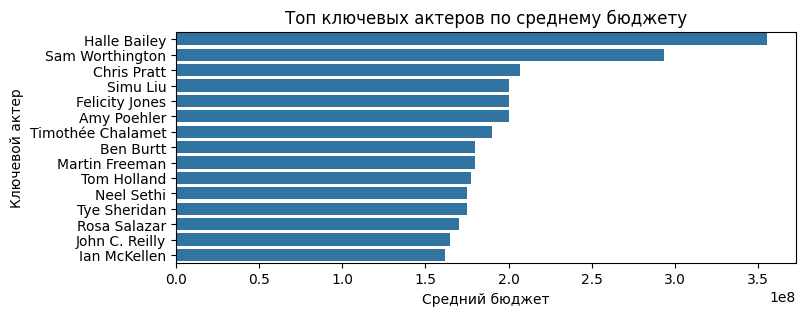

In [89]:
# 10. Ключевой актер и бюджет (cast_1 vs budget).
cast_budget = df.groupby('cast_1')['budget'].mean().sort_values(ascending=False)
print("Топ ключевых актеров по среднему бюджету:")
print(cast_budget.head(15))

# Визуализация
plt.figure(figsize=(8, 3))
sns.barplot(x=cast_budget.head(15).values, y=cast_budget.head(15).index)
plt.title("Топ ключевых актеров по среднему бюджету")
plt.xlabel("Средний бюджет")
plt.ylabel("Ключевой актер")
plt.show()


Жанры и ключевые актеры:
0             Drama
1             Crime
2            Action
3         Biography
4             Crime
           ...     
1450      Biography
1451      Biography
1452          Drama
1453    Documentary
1454         Comedy
Name: genre_1, Length: 1451, dtype: object


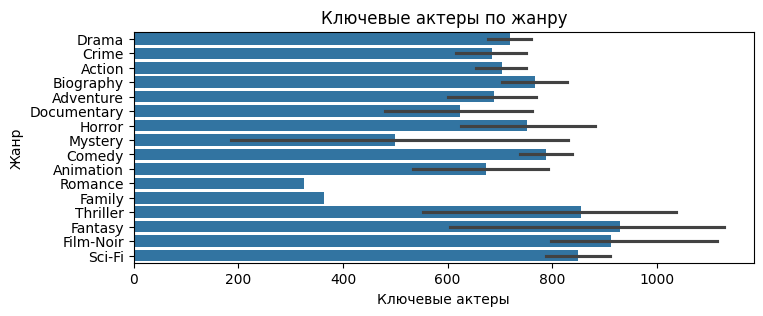

In [90]:
# 11. Ключевой актер и жанр (cast_1 vs genre)
cast_genre = df.groupby('cast_1')['genre_1']
print("\nЖанры и ключевые актеры:")
print(cast_genre.head(15))

# Визуализация
plt.figure(figsize=(8, 3))
sns.barplot(x=cast_genre.head(15).index, y=cast_genre.head(15).values)
plt.title("Ключевые актеры по жанру")
plt.xlabel("Ключевые актеры")
plt.ylabel("Жанр")
plt.show()


Топ ключевых актеров по кассовым сборам:
cast_1
Tom Cruise           6991917945
Daniel Radcliffe     6775816260
Tom Hanks            6689161159
Leonardo DiCaprio    6153125707
Sam Worthington      5243956307
Robert Downey Jr.    4688927723
Tom Holland          4108313026
Christian Bale       3147050451
Daniel Craig         3044840046
Elijah Wood          2968267975
Johnny Depp          2639380319
Brad Pitt            2494869808
Chris Pratt          2482663056
Hugh Jackman         1976540423
Harrison Ford        1953152237
Name: worldwide_gross, dtype: int64


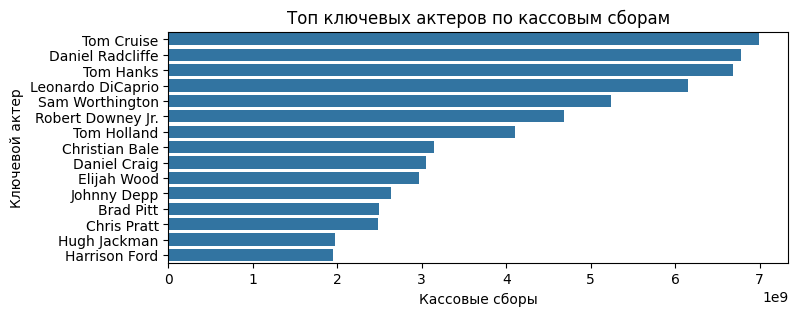

In [92]:
# 12. Ключевой актер и кассовые сборы (cast_1 vs worldwide_gross)
cast_worldwide_gross = df.groupby('cast_1')['worldwide_gross'].sum().sort_values(ascending=False)
print("\nТоп ключевых актеров по кассовым сборам:")
print(cast_worldwide_gross.head(15))

# Визуализация
plt.figure(figsize=(8, 3))
sns.barplot(x=cast_worldwide_gross.head(15).values, y=cast_worldwide_gross.head(15).index)
plt.title("Топ ключевых актеров по кассовым сборам")
plt.xlabel("Кассовые сборы")
plt.ylabel("Ключевой актер")
plt.show()

### Вывод.
Видна однозначная зависимость между ключевым актером и кассовыми сборами.
По другим показателям зависимость неоднонозначная.

Топ языков по среднему рейтингу:
language_1
Telugu                    8.233333
Kannada                   8.200000
Malayalam                 8.100000
Italian                   8.050000
Hebrew                    8.000000
Portuguese                8.000000
Serbian                   7.925000
Arabic                    7.828571
Russian                   7.816667
Maya                      7.800000
Danish                    7.800000
American Sign Language    7.750000
Hindi                     7.730769
Tibetan                   7.700000
Dutch                     7.700000
Name: average_rating, dtype: float64


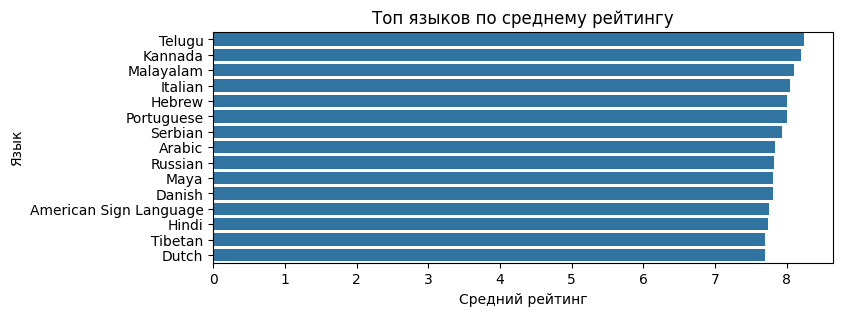

In [99]:
# 13. Язык и рейтинг (language_1 vs average_rating).
language_rating = df.groupby('language_1')['average_rating'].mean().sort_values(ascending=False)
print("Топ языков по среднему рейтингу:")
print(language_rating.head(15))

# Визуализация
plt.figure(figsize=(8, 3))
sns.barplot(x=language_rating.head(15).values, y=language_rating.head(15).index)
plt.title("Топ языков по среднему рейтингу")
plt.xlabel("Средний рейтинг")
plt.ylabel("Язык")
plt.show()

Топ языков по среднему бюджету:
language_1
Maya                      4.000000e+07
English                   3.323825e+07
Aramaic                   3.000000e+07
Aboriginal                2.300000e+07
Norwegian                 2.200000e+07
Dari                      2.000000e+07
Mongolian                 1.800000e+07
American Sign Language    1.350000e+07
Dutch                     1.275000e+07
Mandarin                  1.020000e+07
Cantonese                 9.800936e+06
German                    8.803000e+06
Hindi                     8.132308e+06
Russian                   8.116667e+06
Japanese                  7.852273e+06
Name: budget, dtype: float64


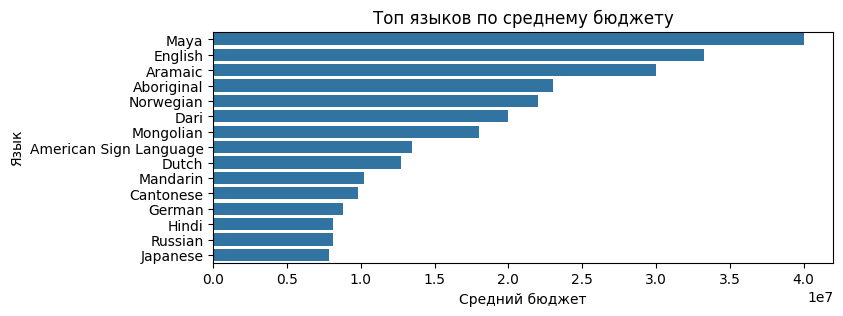

In [94]:
# 14. Язык и бюджет (language_1 vs budget).
language_budget = df.groupby('language_1')['budget'].mean().sort_values(ascending=False)
print("Топ языков по среднему бюджету:")
print(language_budget.head(15))

# Визуализация
plt.figure(figsize=(8, 3))
sns.barplot(x=language_budget.head(15).values, y=language_budget.head(15).index)
plt.title("Топ языков по среднему бюджету")
plt.xlabel("Средний бюджет")
plt.ylabel("Язык")
plt.show()


Жанры и языки:
0             Drama
1             Crime
2            Action
3         Biography
4             Crime
           ...     
1434          Drama
1439          Drama
1440      Adventure
1449          Crime
1453    Documentary
Name: genre_1, Length: 144, dtype: object


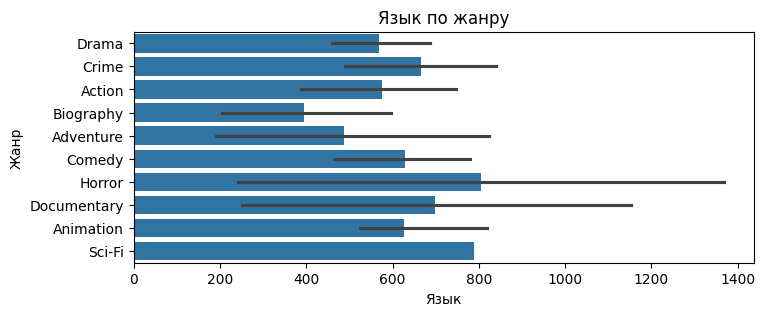

In [95]:
# 15. Язык и жанр (language_1 vs genre)
language_genre = df.groupby('language_1')['genre_1']
print("\nЖанры и языки:")
print(language_genre.head(15))

# Визуализация
plt.figure(figsize=(8, 3))
sns.barplot(x=language_genre.head(15).index, y=language_genre.head(15).values)
plt.title("Язык по жанру")
plt.xlabel("Язык")
plt.ylabel("Жанр")
plt.show()


Топ языков по кассовым сборам:
language_1
English                   182203803548
Aramaic                      612060372
French                       392546217
American Sign Language       342860352
Hindi                        318588722
Japanese                     263569723
Mandarin                     242486158
Spanish                      218383103
Korean                       182926874
Maya                         120654337
Swedish                      115655435
German                       111730937
Arabic                        77900039
Dari                          75011029
Turkish                       66968316
Name: worldwide_gross, dtype: int64


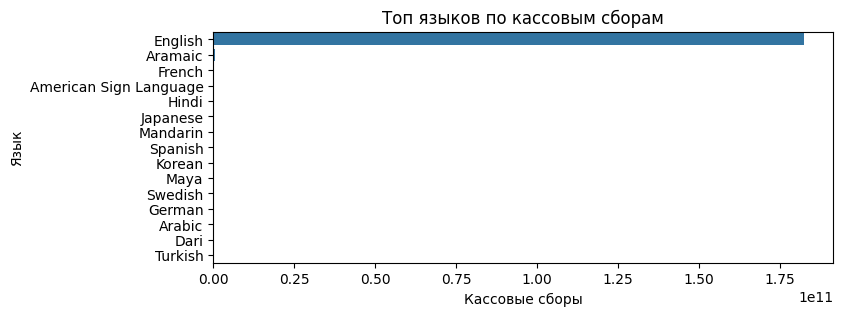

In [96]:
# 16. Язык и кассовые сборы (language_1 vs worldwide_gross)
language_worldwide_gross = df.groupby('language_1')['worldwide_gross'].sum().sort_values(ascending=False)
print("\nТоп языков по кассовым сборам:")
print(language_worldwide_gross.head(15))

# Визуализация
plt.figure(figsize=(8, 3))
sns.barplot(x=language_worldwide_gross.head(15).values, y=language_worldwide_gross.head(15).index)
plt.title("Топ языков по кассовым сборам")
plt.xlabel("Кассовые сборы")
plt.ylabel("Язык")
plt.show()

### Вывод.
Видна однозначная зависимость между языком и кассовыми сборами.
По другим показателям зависимость неоднонозначная.

Топ жанров по среднему рейтингу:
genre_1
Mystery        7.877778
Family         7.800000
Romance        7.800000
Documentary    7.741176
Crime          7.665986
Adventure      7.641584
Animation      7.623529
Drama          7.617708
Action         7.614176
Biography      7.583784
Horror         7.572727
Comedy         7.549802
Sci-Fi         7.450000
Film-Noir      7.450000
Fantasy        7.400000
Name: average_rating, dtype: float64


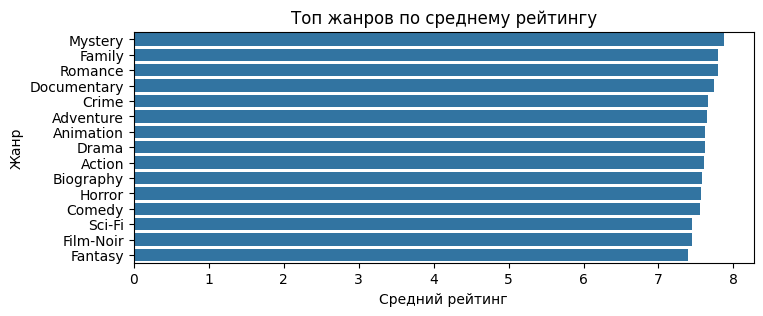

In [100]:
# 17. Жанр и рейтинг (genre_1 vs average_rating).
genre_rating = df.groupby('genre_1')['average_rating'].mean().sort_values(ascending=False)
print("Топ жанров по среднему рейтингу:")
print(genre_rating.head(15))

# Визуализация
plt.figure(figsize=(8, 3))
sns.barplot(x=genre_rating.head(15).values, y=genre_rating.head(15).index)
plt.title("Топ жанров по среднему рейтингу")
plt.xlabel("Средний рейтинг")
plt.ylabel("Жанр")
plt.show()

Топ жанров по среднему бюджету:
genre_1
Animation      9.377941e+07
Action         7.129878e+07
Adventure      4.511342e+07
Fantasy        4.236667e+07
Romance        3.500000e+07
Biography      2.618685e+07
Crime          2.085704e+07
Mystery        1.927544e+07
Drama          1.792387e+07
Thriller       1.733333e+07
Sci-Fi         1.358750e+07
Comedy         1.117703e+07
Horror         9.359363e+06
Family         3.000000e+06
Documentary    2.448643e+06
Name: budget, dtype: float64


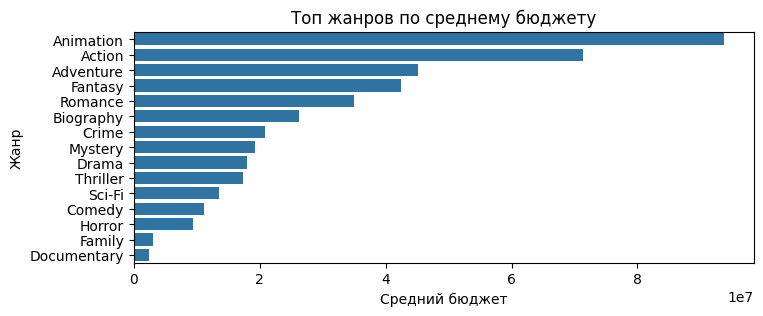

In [101]:
# 18. Жанр и бюджет (genre_1 vs budget).
genre_budget = df.groupby('genre_1')['budget'].mean().sort_values(ascending=False)
print("Топ жанров по среднему бюджету:")
print(genre_budget.head(15))

# Визуализация
plt.figure(figsize=(8, 3))
sns.barplot(x=genre_budget.head(15).values, y=genre_budget.head(15).index)
plt.title("Топ жанров по среднему бюджету")
plt.xlabel("Средний бюджет")
plt.ylabel("Жанр")
plt.show()


Топ жанров по кассовым сборам:
language_1
English                   182203803548
Aramaic                      612060372
French                       392546217
American Sign Language       342860352
Hindi                        318588722
Japanese                     263569723
Mandarin                     242486158
Spanish                      218383103
Korean                       182926874
Maya                         120654337
Swedish                      115655435
German                       111730937
Arabic                        77900039
Dari                          75011029
Turkish                       66968316
Name: worldwide_gross, dtype: int64


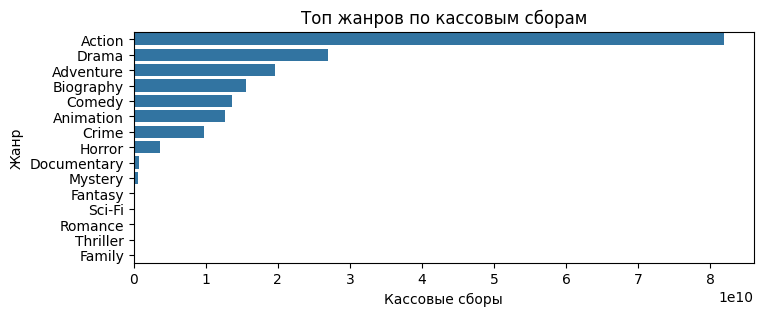

In [102]:
# 19. Жанр и кассовые сборы (genre_1 vs worldwide_gross)
genre_worldwide_gross = df.groupby('genre_1')['worldwide_gross'].sum().sort_values(ascending=False)
print("\nТоп жанров по кассовым сборам:")
print(language_worldwide_gross.head(15))

# Визуализация
plt.figure(figsize=(8, 3))
sns.barplot(x=genre_worldwide_gross.head(15).values, y=genre_worldwide_gross.head(15).index)
plt.title("Топ жанров по кассовым сборам")
plt.xlabel("Кассовые сборы")
plt.ylabel("Жанр")
plt.show()

### Вывод.
Видна четкая взаимосвязть между жанром, средним бюджетом и кассовыми сборами.
С рейтингом не коррелирует.

Топ стран по среднему рейтингу:
country_of_origin_1
Lebanon                           8.400000
Soviet Union                      8.100000
Federal Republic of Yugoslavia    8.000000
Egypt                             8.000000
Brazil                            8.000000
Israel                            8.000000
New Zealand                       7.936364
Italy                             7.916667
Czech Republic                    7.900000
Serbia                            7.900000
India                             7.831818
Denmark                           7.740000
Ireland                           7.733333
Sweden                            7.700000
France                            7.621951
Name: average_rating, dtype: float64


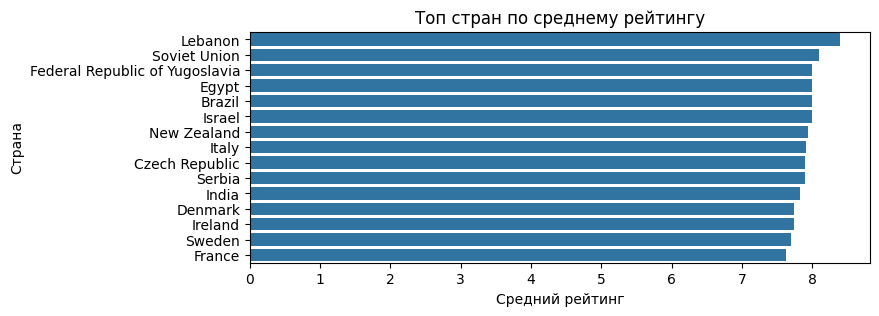

In [103]:
# 20. Страна и рейтинг (country_of_origin_1 vs average_rating).
country_of_origin_rating = df.groupby('country_of_origin_1')['average_rating'].mean().sort_values(ascending=False)
print("Топ стран по среднему рейтингу:")
print(country_of_origin_rating.head(15))

# Визуализация
plt.figure(figsize=(8, 3))
sns.barplot(x=country_of_origin_rating.head(15).values, y=country_of_origin_rating.head(15).index)
plt.title("Топ стран по среднему рейтингу")
plt.xlabel("Средний рейтинг")
plt.ylabel("Страна")
plt.show()

Топ стран по среднему бюджету:
country_of_origin_1
New Zealand       8.904545e+07
Hong Kong         3.432183e+07
United States     3.363443e+07
Australia         3.300417e+07
United Kingdom    2.991860e+07
Switzerland       2.833333e+07
Sweden            2.691250e+07
Germany           2.669209e+07
Belgium           2.575000e+07
Ireland           2.246111e+07
Norway            2.200000e+07
Canada            2.188229e+07
Japan             2.159792e+07
Kenya             2.000000e+07
South Africa      1.750000e+07
Name: budget, dtype: float64


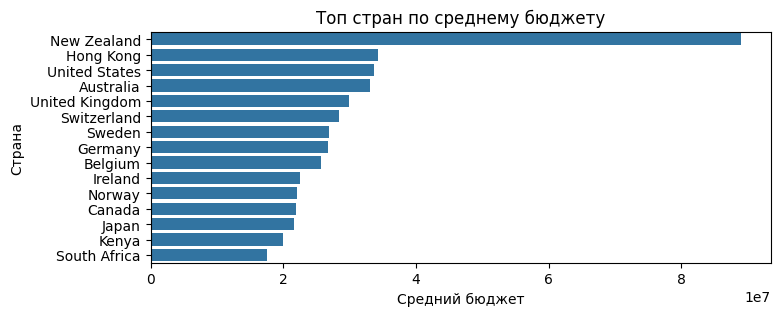

In [104]:
# 21. Страна и бюджет (country_of_origin_1 vs budget).
language_budget = df.groupby('country_of_origin_1')['budget'].mean().sort_values(ascending=False)
print("Топ стран по среднему бюджету:")
print(language_budget.head(15))

# Визуализация
plt.figure(figsize=(8, 3))
sns.barplot(x=language_budget.head(15).values, y=language_budget.head(15).index)
plt.title("Топ стран по среднему бюджету")
plt.xlabel("Средний бюджет")
plt.ylabel("Страна")
plt.show()


Страны и языки:
0           Drama
1           Crime
2          Action
3       Biography
4           Crime
          ...    
1411    Adventure
1416        Drama
1434        Drama
1440    Adventure
1454       Comedy
Name: genre_1, Length: 233, dtype: object


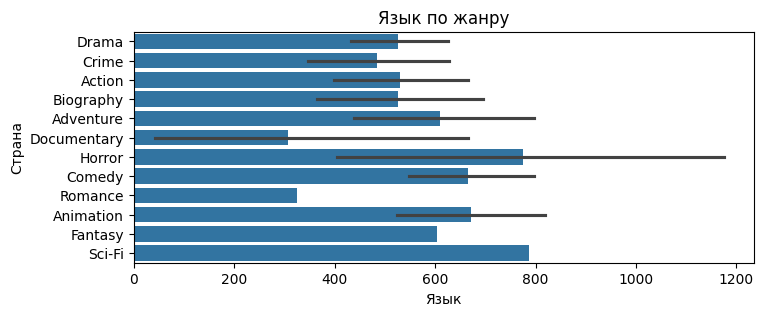

In [105]:
# 22. Страна и жанр (country_of_origin_1 vs genre)
country_of_origin_genre = df.groupby('country_of_origin_1')['genre_1']
print("\nСтраны и языки:")
print(country_of_origin_genre.head(15))

# Визуализация
plt.figure(figsize=(8, 3))
sns.barplot(x=country_of_origin_genre.head(15).index, y=country_of_origin_genre.head(15).values)
plt.title("Язык по жанру")
plt.xlabel("Язык")
plt.ylabel("Страна")
plt.show()


Топ стран по кассовым сборам:
language_1
English                   182203803548
Aramaic                      612060372
French                       392546217
American Sign Language       342860352
Hindi                        318588722
Japanese                     263569723
Mandarin                     242486158
Spanish                      218383103
Korean                       182926874
Maya                         120654337
Swedish                      115655435
German                       111730937
Arabic                        77900039
Dari                          75011029
Turkish                       66968316
Name: worldwide_gross, dtype: int64


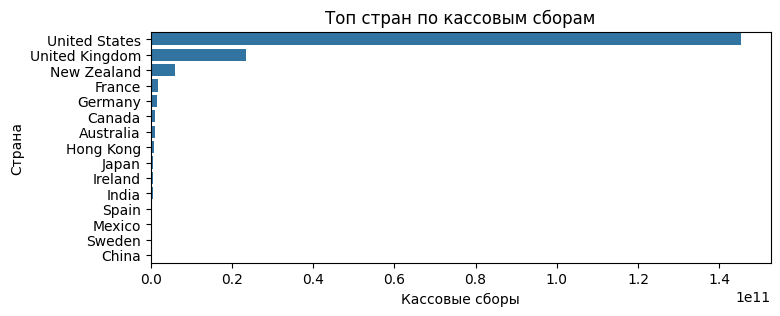

In [106]:
# 23. Страна и кассовые сборы (country_of_origin_1 vs worldwide_gross)
country_of_origin_worldwide_gross = df.groupby('country_of_origin_1')['worldwide_gross'].sum().sort_values(ascending=False)
print("\nТоп стран по кассовым сборам:")
print(language_worldwide_gross.head(15))

# Визуализация
plt.figure(figsize=(8, 3))
sns.barplot(x=country_of_origin_worldwide_gross.head(15).values, y=country_of_origin_worldwide_gross.head(15).index)
plt.title("Топ стран по кассовым сборам")
plt.xlabel("Кассовые сборы")
plt.ylabel("Страна")
plt.show()

### Вывод.
Видна однозначная зависимость между страной и кассовыми сборами.
По другим показателям зависимость неоднонозначная.


Топ годов выхода по среднему рейтингу:
release_year
1943    8.500000
1931    8.150000
1925    8.100000
1959    8.100000
1949    8.100000
1928    8.100000
1957    8.083333
1947    8.000000
1920    8.000000
1944    7.950000
1936    7.933333
1950    7.933333
1951    7.916667
1927    7.900000
1963    7.900000
Name: average_rating, dtype: float64


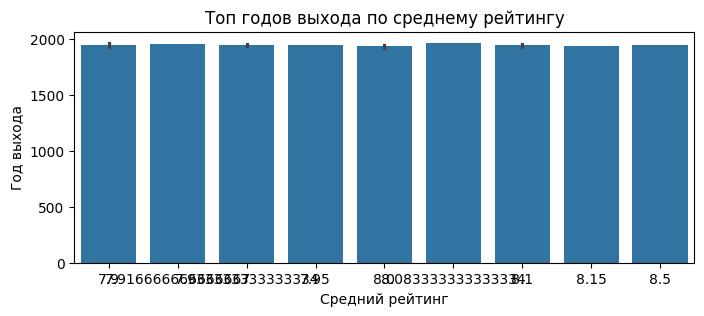

In [107]:
# 24. Год выхода и рейтинг (release_year vs average_rating).
release_year_rating = df.groupby('release_year')['average_rating'].mean().sort_values(ascending=False)
print("Топ годов выхода по среднему рейтингу:")
print(release_year_rating.head(15))

# Визуализация
plt.figure(figsize=(8, 3))
sns.barplot(x=release_year_rating.head(15).values, y=release_year_rating.head(15).index)
plt.title("Топ годов выхода по среднему рейтингу")
plt.xlabel("Средний рейтинг")
plt.ylabel("Год выхода")
plt.show()

Топ годов выхода по среднему бюджету:
release_year
2023    9.472353e+07
2012    7.624583e+07
2022    7.190125e+07
2024    5.372500e+07
2011    5.282733e+07
2021    5.268387e+07
2014    5.179295e+07
2009    4.820606e+07
2008    4.582105e+07
2016    4.468947e+07
2018    4.354733e+07
2017    4.353000e+07
2002    4.342500e+07
2013    4.312586e+07
2005    4.149355e+07
Name: budget, dtype: float64


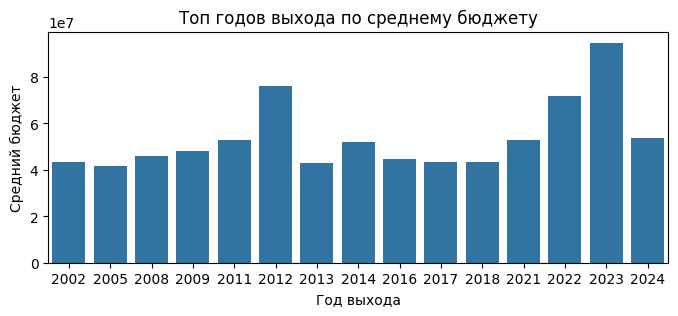

In [119]:
# 25. Год выхода и бюджет (release_year vs budget).
release_year_budget = df.groupby('release_year')['budget'].mean().sort_values(ascending=False)
print("Топ годов выхода по среднему бюджету:")
print(release_year_budget.head(15))

# Визуализация
plt.figure(figsize=(8, 3))
sns.barplot(x=release_year_budget.head(15).index, y=release_year_budget.head(15).values)
plt.title("Топ годов выхода по среднему бюджету")
plt.xlabel("Год выхода")
plt.ylabel("Средний бюджет")
plt.show()


Годы выхода и жанры:
release_year
2017    60
2013    58
2019    54
2014    45
2020    45
2018    45
2015    39
2016    38
2010    37
2007    37
2004    33
2009    33
2021    31
2005    31
2000    30
Name: genre_1, dtype: int64


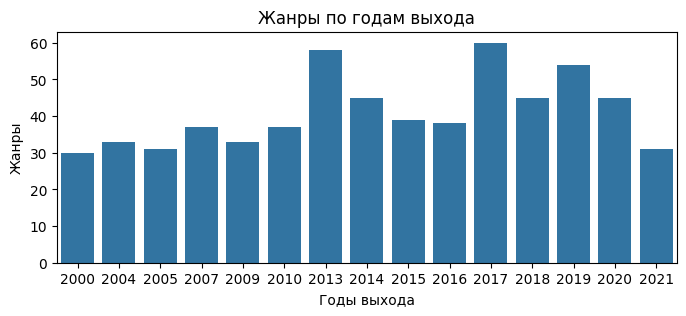

In [117]:
# 26. Год выхода и жанр (release_year vs genre)
release_year_genre = df.groupby('release_year')['genre_1'].count().sort_values(ascending=False)
print("\nГоды выхода и жанры:")
print(release_year_genre.head(15))

# Визуализация
plt.figure(figsize=(8, 3))
sns.barplot(x=release_year_genre.head(15).index, y=release_year_genre.head(15).values)
plt.title("Жанры по годам выхода")
plt.xlabel("Годы выхода")
plt.ylabel("Жанры")
plt.show()


Топ стран по кассовым сборам:
release_year
2017    11302786744
2014     9879307523
2013     9830300470
2018     9502925631
2019     9245162367
2012     8635995327
2016     8069660331
2011     7692215148
2009     7288753602
2015     6930756688
2021     6071434099
2004     6018808510
2010     5876864563
2022     5847585048
2020     5728739780
2003     4753365941
2005     4279804662
2023     4239116342
2007     4135161505
1998     3993675207
2002     3389692247
2008     3375161151
2000     3287273996
2024     3237637507
2006     3057614469
1990     2915509517
1991     2356321586
1995     2303447591
1994     2122887305
1996     1498275678
Name: worldwide_gross, dtype: int64


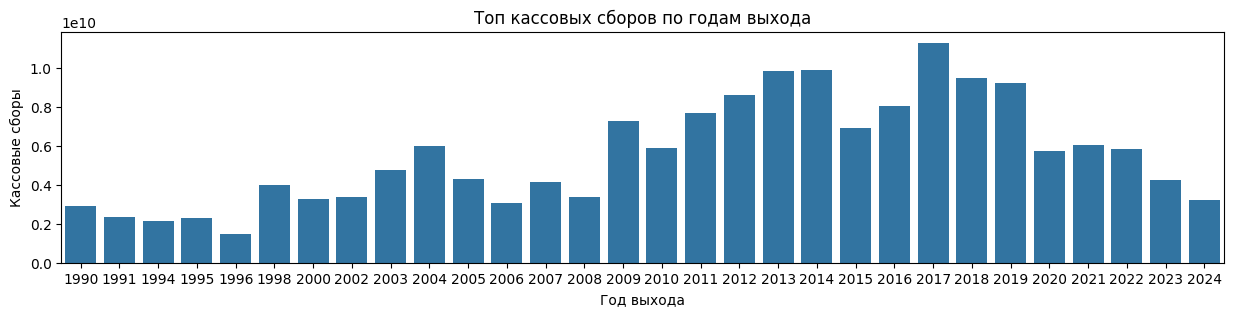

In [116]:
# 27. Год выхода и кассовые сборы (release_year vs worldwide_gross)
release_year_worldwide_gross = df.groupby('release_year')['worldwide_gross'].sum().sort_values(ascending=False)
print("\nТоп стран по кассовым сборам:")
print(release_year_worldwide_gross.head(30))

# Визуализация
plt.figure(figsize=(15, 3))
sns.barplot(x=release_year_worldwide_gross.head(30).index, y=release_year_worldwide_gross.head(30).values)
plt.title("Топ кассовых сборов по годам выхода")
plt.xlabel("Год выхода")
plt.ylabel("Кассовые сборы")
plt.show()

### Вывод.
Явная зависимость отсутствует.
Однако, прослеживается рост кассовых сборов начиная с 90-х годов и более уверенным с 2000-х, но с просадкой в 2020-е.

## Выводы расширенного анализа.
Прослеживается явная взаимосвязь между бюджетом, кассовыми сборами, жанром, режиссером, актером, сценаристом, страной происхождения и годом выхода картины.
Но это в первую очередь касается топовых режиссеров/актеров/сценаристов/жанров, что позволяет сделать предположение о неком "авторском замысле" (идее), реализованном в картине с помощью актеров и доступных спецэффектов (например, Кристофера Нолана) на момент работы над картиной либо наоборот, сюжете (Властелин колец).
Вполне вероятно, что в картинах не топового уровня успех обусловлен в основном качеством совместной работы команды (режиссера, актеров, сценариста), выбором жанра, а не в бюджете.
Иные допущения о своевременности выхода или общественном запросе картины сделать невозможно в пределах данного датасета.


## Предложения для дальнейшего анализа:
1. Изучить влияние студий (например, Marvel, Pixar) на показатели.
2. Использовать ML-модели для предсказания успеха фильма на основе жанра, режиссера и актерского состава, и возможно, бюджета.